## <font color='Green'> Back Propagation And Gradient Checking <font>

## <font color='red'>Loading data </font>

In [63]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [64]:
import numpy as np
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    value=1/(1+np.exp(-z))
    return value

In [65]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [66]:
def forward_propagation(x, y, w):
    '''In this function, we will compute the Forward Propagation '''
    dict={}
    # Because indexing starts from 0, So W1 become w[0], w2 become w[1] and so on.
    # and f1 become x[0], f2 become x[1] and so on.
    part1=np.exp((((w[0]*x[0])+(w[1]*x[1]))*((w[0]*x[0])+(w[1]*x[1])))+w[5])
    part2=np.tanh(part1+w[6])
    part3=((np.sin(w[2]*x[2]))*((w[3]*x[3])+(w[4]*x[4])))+w[7]
    sig=sigmoid(part3)
    y_pred=part2+sig*w[8]       # Predicted Value
    loss=pow(y-y_pred, 2)       # Squared loss 
    dl=-2*(y-y_pred)            # Derivative of loss function 
    dict["exp"]=part1
    dict['tanh']=part2
    dict["sigmoid"]=sig
    dict["dl"]=dl
    dict["loss"]=loss
    dict["y_pred"]=y_pred
    return dict

In [67]:
def grader_forwardprop(data):
    dl = (data['dl']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'> Task 1.2 </font>

## <font color="blue"> Back Propagation </font>

In [68]:
def backward_propagation(x,y,w,dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    
    backprop_dict={}
    dw1 = dict['dl'] * (1-(dict['tanh']**2)) * dict['exp'] * 2 * (w[0]*x[0]+w[1]*x[1]) * x[0]
    dw2 = dict['dl'] * (1-dict['tanh']**2) * dict['exp'] * 2 * (w[0]*x[0]+w[1]*x[1]) * x[1]
    dw3 = dict['dl'] * dict['sigmoid']*(1-dict['sigmoid'])*(w[3]*x[3]+w[4]*x[4])*np.cos(w[2]*x[2])*x[2] * w[8]
    dw4 = dict['dl'] * dict['sigmoid']*(1-dict['sigmoid'])*np.sin(w[2]*x[2])*x[3] * w[8]
    dw5 = dict['dl'] * dict['sigmoid']*(1-dict['sigmoid'])*np.sin(w[2]*x[2])*x[4] * w[8]
    dw6 = dict['dl'] * (1-dict['tanh']**2)* dict['exp']
    dw7 = dict['dl'] * (1-dict['tanh']**2)
    dw8 = dict['dl'] * dict['sigmoid']*(1-dict['sigmoid']) * w[8]
    dw9 = dict['dl'] * dict['sigmoid']
    backprop_dict['dw1'] = dw1
    backprop_dict['dw2'] = dw2
    backprop_dict['dw3'] = dw3
    backprop_dict['dw4'] = dw4
    backprop_dict['dw5'] = dw5
    backprop_dict['dw6'] = dw6
    backprop_dict['dw7'] = dw7
    backprop_dict['dw8'] = dw8
    backprop_dict['dw9'] = dw9
    return backprop_dict

In [69]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [70]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    original_gradients_list=list(backward_dict.values())
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    
    approx_gradients_list=[]
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    for i in range(len(w)):
        temp = w.copy()
        temp[i] = temp[i] + eps
        f = forward_propagation(x,y,temp)
        f = f['loss']
        temp = w.copy()
        temp[i] = temp[i] - eps
        f1 = forward_propagation(x,y,temp)
        f1 = f1['loss']
        approx_gradients_list.append((f-f1)/(2*eps))
    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    return gradient_check_value

In [71]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-1.73921918e-08  1.63713365e-06  5.73356054e-05  3.77243270e-05
 -1.95446016e-04 -1.16536595e-10 -3.79907639e-10 -1.06774471e-07
 -7.02865325e-10]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [79]:
import numpy as np
from sklearn.metrics import mean_squared_error 
rate=.001
# mean and standard deviation
w = np.random.normal(0, 0.01, 9) # weight intialization

In [80]:
loss_val_vanilla=[]
epoc_vanilla=[]
for epoch in range(100):
    epoc_vanilla.append(epoch)
    y_pred=[]
    for point in range(len(X)):
       # x = X[point]
       # yi = y[point]
        forward=forward_propagation(X[point], y[point], w)
        y_pred.append(forward['y_pred'])
        backward = backward_propagation(X[point],y[point],w,forward)
        key_dict = [i for i in backward.keys()]
        for weig in range(len(w)):
            w[weig] = w[weig] - rate * backward[key_dict[weig]]
    loss=mean_squared_error(y,y_pred) 
    loss_val_vanilla.append(loss)

### Plot between epochs and loss

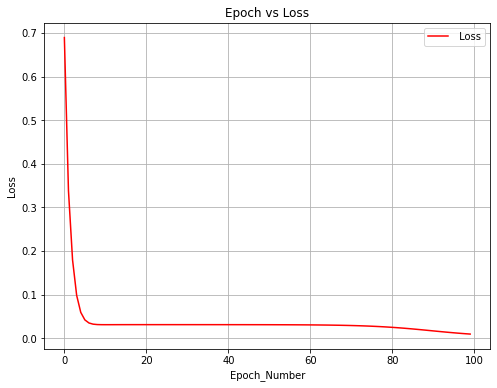

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoc_vanilla,loss_val_vanilla, label=' Loss', color='r')
plt.title("Epoch vs Loss")
plt.xlabel("Epoch_Number")
plt.ylabel("Loss")
plt.legend()

## Obseravation from above graph
1. Loss is started reducing from 0.7, as no. of epochs increases.
2. After almost 5 epochs to 80 epochs loss is constant and equal to 0.05
3. After 80 epochs loss reduced more and tends to 0

### Algorithm with momentum update of weights

In [85]:
rate=.001
v=np.zeros(9)
gamma=.9
mu, sigma = 0, 0.01 
# weight intialization
w = np.random.normal(mu, sigma, 9) 

In [86]:
loss_val_momentum=[]
epoc_momentum=[]
for epoch in range(100):
    epoc_momentum.append(epoch)
    y_pred=[]
    for point in range(len(data)):
        forward=forward_propagation(X[point], y[point], w)
        y_pred.append(forward['y_pred'])
        backward=backward_propagation(X[point],y[point],w,forward)
        key_dict = [i for i in backward.keys()]

        #Updating weights
        for k in range(len(w)):
            v[k] = gamma * v[k] + (1-gamma)*backward[key_dict[k]]
            w[k] = w[k] - rate * v[k]
        
    loss=mean_squared_error(y,y_pred) 
    loss_val_momentum.append(loss)

### Plot between epochs and loss

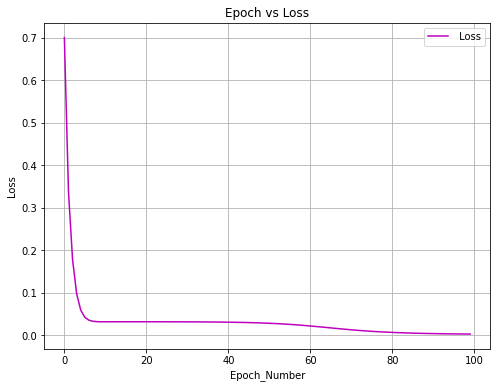

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoc_momentum,loss_val_momentum, label=' Loss',color='m')
plt.title("Epoch vs Loss")
plt.xlabel("Epoch_Number")
plt.ylabel("Loss")
plt.legend()

## Obseravation from above graph
1. Loss is started reducing from 0.7, as no. of epochs increases.
2. After almost 5 epochs to 60 epochs loss is constant and equal to less than 0.05
3. After 60 epochs loss converges more and tends to 0
4. Momentum based SGD is slight better converges from Vanilla optimizer.

### Algorithm with Adam update of weights

In [55]:
m=np.zeros(9)
v=np.zeros(9)
b1=.9
b2=0.999
z=1e-8
rate=.001
# mean and standard deviation
mu, sigma = 0, 0.01
# weight intialization
w = np.random.normal(mu, sigma, 9) 

In [56]:
import math
loss_val_adam=[]
epoc_adam=[]
for epoch in range(100):
    epoc_adam.append(epoch)
    y_pred=[]
    for point in range(len(data)):
        forward=forward_propagation(X[point], y[point], w)
        y_pred.append(forward['y_pred'])
        backward=backward_propagation(X[point],y[point],w,forward)
        key_dict = [i for i in backward.keys()]

        #Updating weights
        for k in range(len(w)):
            m[k] = b1 * m[k] + (1-b1) * backward[key_dict[k]]
            v[k] = b2 * v[k] + (1-b2) * math.pow(backward[key_dict[k]], 2)
            mt = m[k] / (1-b1)
            vt = v[k] / (1-b2)
            w[k] = w[k] - rate * (mt/math.sqrt(vt) + eps)
       
    loss=mean_squared_error(y,y_pred) 
    loss_val_adam.append(loss)

### Plot between epochs and loss

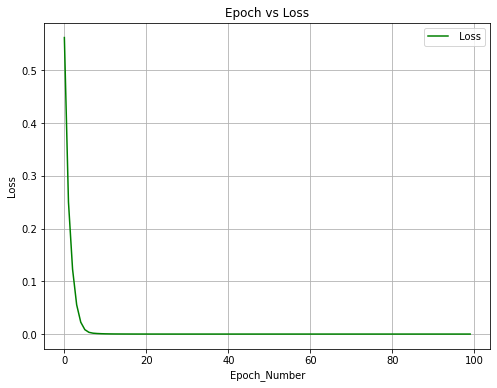

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoc_adam,loss_val_adam, label=' Loss',color='g')
plt.title("Epoch vs Loss")
plt.xlabel("Epoch_Number")
plt.ylabel("Loss")
plt.legend()

## Obseravation from above graph
1. Loss is started reducing from 0.5, as no. of epochs increases.
2. After almost 5 epochs graph converges sharply and reduced to approx 0
3. Adam optimizer converges very fast as compared to other optimizer.

### Comparision plot between epochs and loss with different optimizers

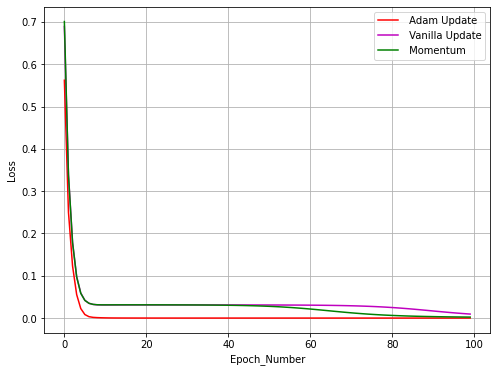

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoc_adam,loss_val_adam, label=' Adam Update',color='r')
plt.plot(epoc_vanilla,loss_val_vanilla, label=' Vanilla Update',color='m')
plt.plot(epoc_momentum,loss_val_momentum, label=' Momentum',color='g')
plt.xlabel("Epoch_Number")
plt.ylabel("Loss")
plt.legend()

## Obseravation from above graph
1. Adam optimizer converges very fast as compared to other optimizer.
2. Vanilla and Momentum based SGD optimizer seems almost same for this data.
3. But somehow Momentum optimizer is better than Vanilla optimizer.